In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [25]:
COVIDPovCount = pd.read_csv('COVIDpovertycount.csv',index_col = 0)
COVIDPovCount.head()

,State,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,387786,14345,"4,763,811","801,758"
1,Alaska,18316,367,"720,866","80,224"
2,Arizona,426614,18857,"7,013,461","990,291"
3,Arkansas,161569,3301,"2,925,473","492,306"
4,California,2664110,102387,"38,818,530","4,972,955"


In [26]:
COVIDPovCount = COVIDPovCount.drop(columns = ['cases', 'deaths'])
COVIDPovCount.head()

,State,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,"4,763,811","801,758"
1,Alaska,"720,866","80,224"
2,Arizona,"7,013,461","990,291"
3,Arkansas,"2,925,473","492,306"
4,California,"38,818,530","4,972,955"


In [27]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [28]:
COVIDPovCount = pd.merge(COVIDPovCount, COVID, how = 'left', on = 'State')
COVIDPovCount.head()

,State,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,cases,deaths
0,Alabama,"4,763,811","801,758",26912,785
1,Alaska,"720,866","80,224",751,10
2,Arizona,"7,013,461","990,291",39298,1228
3,Arkansas,"2,925,473","492,306",13191,188
4,California,"38,818,530","4,972,955",159098,5202


In [29]:
COVIDPovCount['All Ages SAIPE Poverty Universe'] = COVIDPovCount['All Ages SAIPE Poverty Universe'].str.replace(',', '').astype('int64')
COVIDPovCount['All Ages in Poverty Count'] = COVIDPovCount['All Ages in Poverty Count'].str.replace(',', '').astype('int64')

COVIDPovCount.head()

,State,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,cases,deaths
0,Alabama,4763811,801758,26912,785
1,Alaska,720866,80224,751,10
2,Arizona,7013461,990291,39298,1228
3,Arkansas,2925473,492306,13191,188
4,California,38818530,4972955,159098,5202


In [30]:
COVIDPovCount.shape

(51, 5)

In [31]:
COVIDPovCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            51 non-null     object
 1   All Ages SAIPE Poverty Universe  51 non-null     int64 
 2   All Ages in Poverty Count        51 non-null     int64 
 3   cases                            51 non-null     int64 
 4   deaths                           51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [32]:
COVIDPovCount.isnull().sum()

State                              0
All Ages SAIPE Poverty Universe    0
All Ages in Poverty Count          0
cases                              0
deaths                             0
dtype: int64

In [33]:
COVIDPovCount.describe()

,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,cases,deaths
count,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,6.258510e+06,8.206336e+05,41994.235294,2290.549020
std,7.191680e+06,9.767927e+05,63513.183767,4748.588326
min,5.633450e+05,6.009700e+04,614.000000,10.000000
25%,1.738296e+06,2.035985e+05,9231.500000,212.000000
50%,4.326301e+06,5.405790e+05,20152.000000,704.000000
75%,7.207004e+06,8.664515e+05,46961.500000,2469.500000
max,3.881853e+07,4.972955e+06,389349.000000,30683.000000


In [34]:
corr = COVIDPovCount.corr()
corr

,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,cases,deaths
All Ages SAIPE Poverty Universe,1.000000,0.989772,0.660529,0.450282
All Ages in Poverty Count,0.989772,1.000000,0.631878,0.422827
cases,0.660529,0.631878,1.000000,0.957358
deaths,0.450282,0.422827,0.957358,1.000000


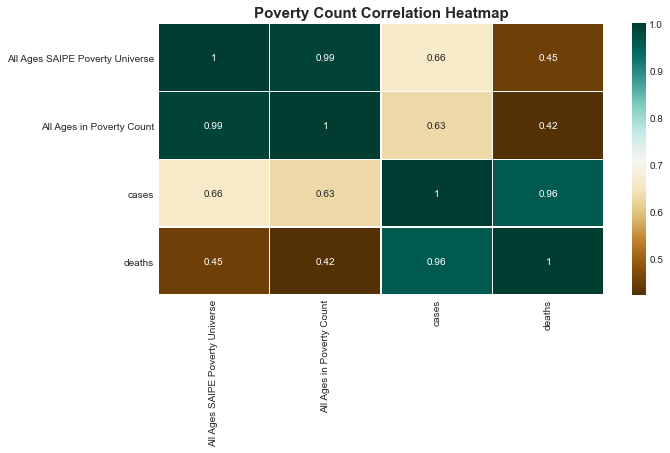

In [35]:
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Poverty Count Correlation Heatmap', fontweight = 'bold', fontsize = 15);

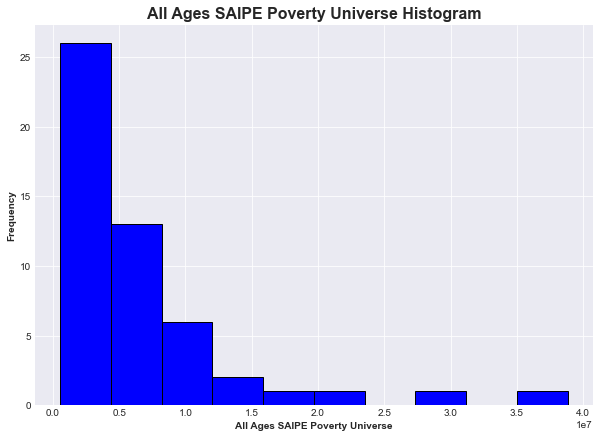

In [36]:
plt.style.use('seaborn-darkgrid')

COVIDPovCount['All Ages SAIPE Poverty Universe'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('All Ages SAIPE Poverty Universe Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages SAIPE Poverty Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

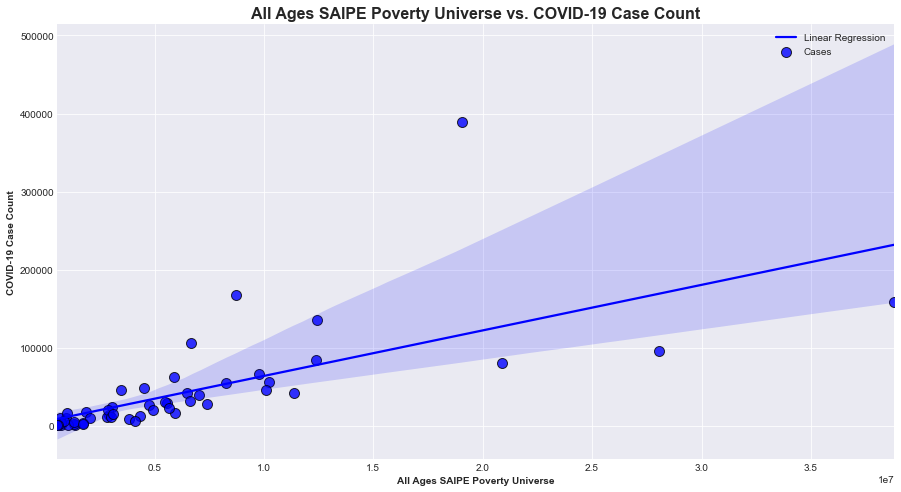

In [37]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'All Ages SAIPE Poverty Universe', y = 'cases', data = COVIDPovCount, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('All Ages SAIPE Poverty Universe vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages SAIPE Poverty Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [38]:
model1 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount['All Ages SAIPE Poverty Universe']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              77.28
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.02e-11
Time:                        00:38:38   Log-Likelihood:                         -621.45
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
All Ages SAIPE Poverty Universe     0.0062      0.001      8.791      0.000       0.005       0.008
==============================================================================
Omnibus:                       71.398   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              822.134
Skew:                           3.627   Prob(JB):                    2.99e-179
Kurtosis:                      21.283   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

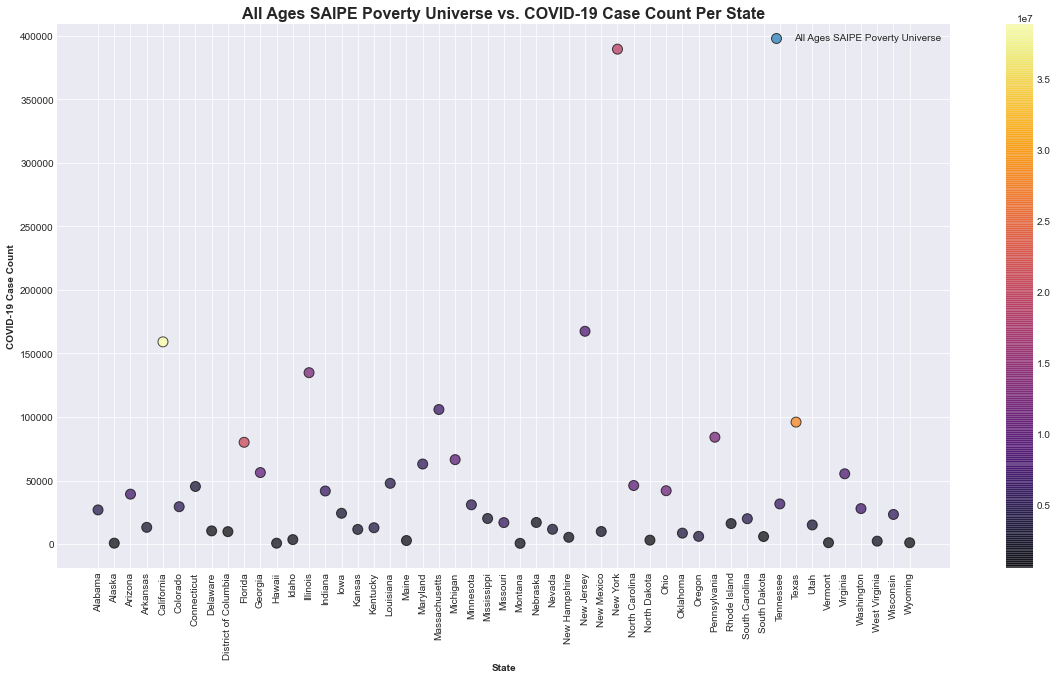

In [39]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDPovCount['State'] 
y = COVIDPovCount['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDPovCount['All Ages SAIPE Poverty Universe'], cmap = 'inferno')
plt.title('All Ages SAIPE Poverty Universe vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['All Ages SAIPE Poverty Universe'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

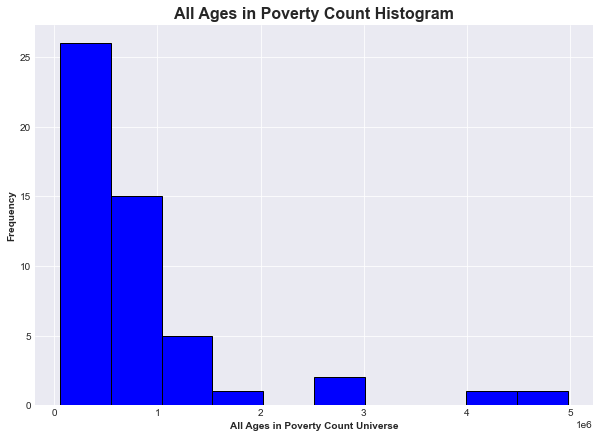

In [40]:
plt.style.use('seaborn-darkgrid')

COVIDPovCount['All Ages in Poverty Count'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('All Ages in Poverty Count Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages in Poverty Count Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

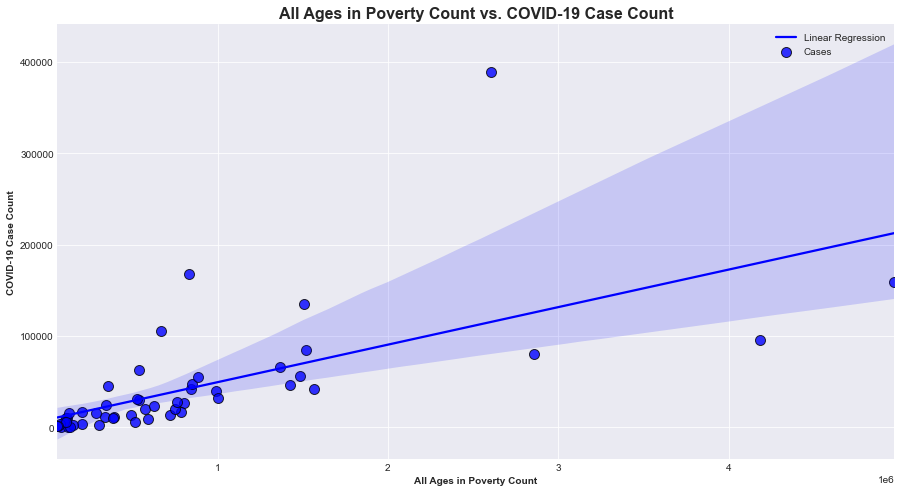

In [41]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'All Ages in Poverty Count', y = 'cases', data = COVIDPovCount, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('All Ages in Poverty Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages in Poverty Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [42]:
model2 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount['All Ages in Poverty Count']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.569
Method:                 Least Squares   F-statistic:                              68.36
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    6.42e-11
Time:                        00:38:39   Log-Likelihood:                         -623.30
No. Observations:                  51   AIC:                                      1249.
Df Residuals:                      50   BIC:                                      1251.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
All Ages in Poverty Count     0.0453      0.005      8.268      0.000       0.034       0.056
==============================================================================
Omnibus:                       66.122   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.308
Skew:                           3.340   Prob(JB):                    2.00e-135
Kurtosis:                      18.726   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

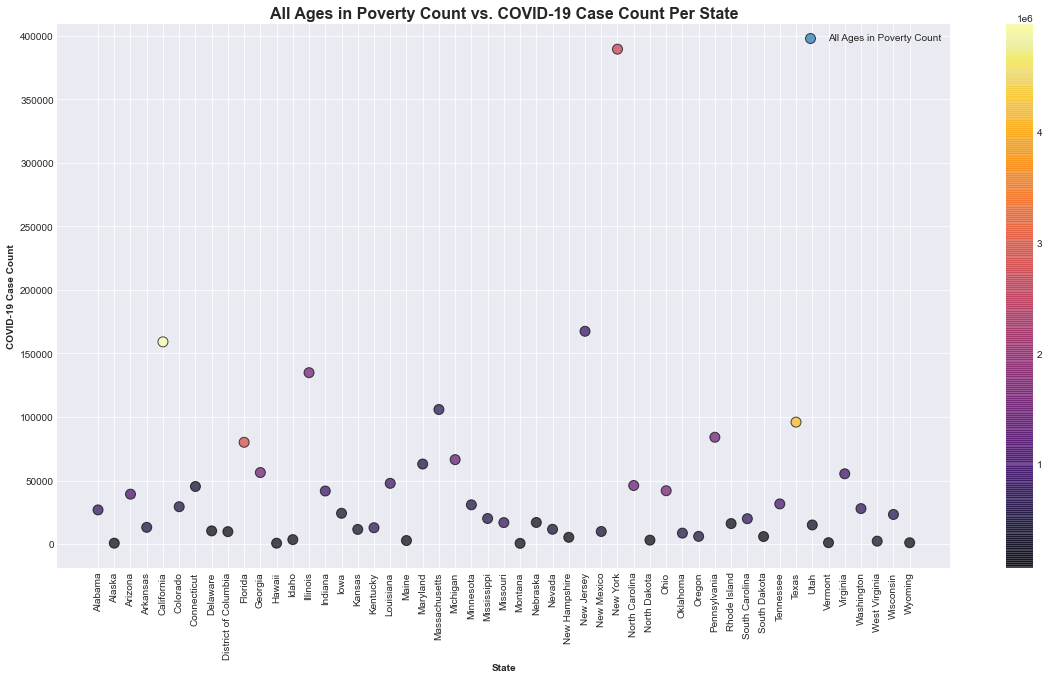

In [43]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDPovCount['State'] 
y = COVIDPovCount['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDPovCount['All Ages in Poverty Count'], cmap = 'inferno')
plt.title('All Ages in Poverty Count vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['All Ages in Poverty Count'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [44]:
model3 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount[['All Ages SAIPE Poverty Universe','All Ages in Poverty Count']]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              40.81
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    3.70e-11
Time:                        00:38:40   Log-Likelihood:                         -620.27
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      49   BIC:                                      1248.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
All Ages SAIPE Poverty Universe     0.0158      0.006      2.485      0.016       0.003       0.029
All Ages in Poverty Count          -0.0724      0.048     -1.519      0.135      -0.168       0.023
==============================================================================
Omnibus:                       77.753   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1150.366
Skew:                           3.991   Prob(JB):                    1.59e-250
Kurtosis:                      24.855   Cond. No.                         69.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""